In [32]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

In [33]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

#### Visualize

In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

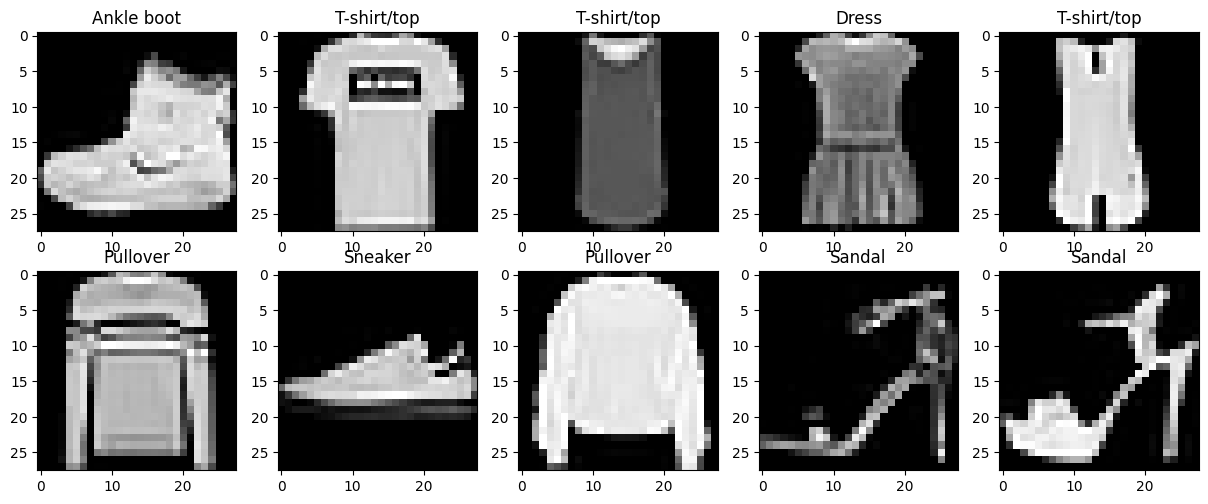

In [36]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

#### Prepare data

In [37]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
'''(4, 28, 28, 3) - Example
4 = # Images
28, 28 = Size of the image
3 = # Channels
'''
x_train = x_train.reshape(-1, 28, 28, 1).astype("float")
x_test = x_test.reshape(-1, 28, 28, 1).astype("float")

In [40]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [41]:
y_train_ohe.shape

(60000, 10)

#### Model Building

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation,Flatten, Dropout
from tensorflow.keras import regularizers

In [68]:
model = Sequential()
model.add(Conv2D(filters=10, kernel_size = (3,3), strides = (1,1), padding='same', 
                 kernel_regularizer =regularizers.L1L2(l1=1, l2=0))) #26x26x10
model.add(Activation("relu")) #26x26x10
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) #13x13x10
model.add(Dropout(0.1)) #13x13x10
model.add(Flatten()) # 1690
model.add(Dense(10, activation="softmax")) # 10

In [69]:
model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [71]:
model.fit(x=x_train, 
          y=y_train_ohe, 
          batch_size=1000, 
          validation_data=(x_test, y_test_ohe), 
        epochs = 2)

Epoch 1/2
60/60 [==============================] - 6s 95ms/step - loss: 25.4957 - accuracy: 0.6258 - val_loss: 13.1916 - val_accuracy: 0.7966
Epoch 2/2
60/60 [==============================] - 6s 101ms/step - loss: 12.7435 - accuracy: 0.7780 - val_loss: 9.9744 - val_accuracy: 0.8251


In [58]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

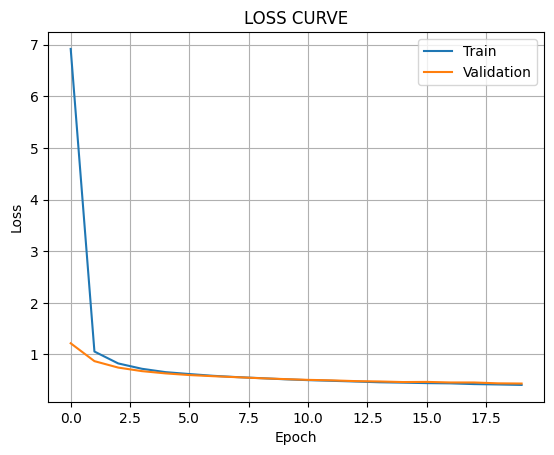

In [59]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

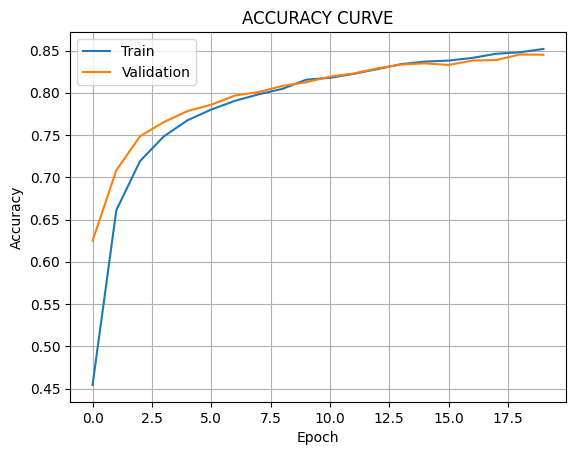

In [60]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

In [72]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (1000, 28, 28, 10)        100       
_________________________________________________________________
activation_8 (Activation)    (1000, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (1000, 14, 14, 10)        0         
_________________________________________________________________
dropout_3 (Dropout)          (1000, 14, 14, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (1000, 1960)              0         
_________________________________________________________________
dense_6 (Dense)              (1000, 10)                19610     
Total params: 19,710
Trainable params: 19,710
Non-trainable params: 0
__________________________________________________